In [65]:
import pandas as pd

In [66]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [67]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


#WE WANNA CLEAN THE DATA FIRST

In [68]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [69]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [70]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x.min() ) / (x.max() - x.min() ))

In [71]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,1,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,0,C
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,1,B
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,0,B
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,1,C


    #WE GOTTA CREATE A LIST OF FEATURE COLUMN SINCE WE USING tf.estimator API ('feature_column objects')

In [76]:
import tensorflow as tf

In [77]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
bmi = tf.feature_column.numeric_column('BMI')
insulin = tf.feature_column.numeric_column('Insulin')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

    #NOW WE CREATE THE NON-CONTINUOUS VALUES i.e CATEGORICAL FEATURES and there are two ways fo this 1).Hash Bucket and 2).Vocabulary List

1). Vocabulary_list

In [89]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

2).Hash Bucket

In [78]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

    #CONVERTING A CONTINUOUS COLUMN TO A CATEGORICAL COLUMN this is called "FEATURE ENGINEERING"

    LET'S VISUALIZE IT FIRST

In [90]:
import matplotlib as plt
%matplotlib inline

<AxesSubplot:>

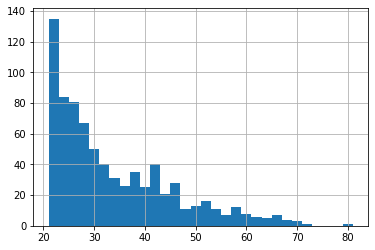

In [91]:
diabetes['Age'].hist(bins = 30)

In [92]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

In [93]:
feat_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'age_bucket']

    #PERFORMING TEST SPLIT ON OUR DATA

In [94]:
X_data = diabetes.drop('Class', axis = 1)

In [95]:
X_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,C
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,B
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,B
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,C


In [96]:
labels = diabetes['Class']

In [97]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size = 0.3, random_state = 101)

    TAKING WHAT WE DID ABOVE AND USE IT TO CREATE OUR MODEL "LinearClassifier" fist we need an input function

In [106]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

AttributeError: module 'tensorflow_estimator.python.estimator.api._v2.estimator' has no attribute 'inputs'

In [104]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdlkgn8dq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [105]:
model.train(input_fn = input_func, steps = 1000)

NameError: name 'input_func' is not defined

    EVALUATING THE MODEL WE WILL USE THE EVALUATION FUNCTION

In [ ]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [ ]:
results = model.evaluate(eval_input_func)

In [ ]:
results

    GETTING THE PREDICTION OFF THE MODEL

In [ ]:
pred_input_func = tf.estimator.inputs.pandas_input_fn = x = (X_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [ ]:
predictions = model.predict(pred_input_func)

    since the prediction methods give us back a generator we will have to pass it as a list in order to get values

In [ ]:
list(predictions) or my_predictions = list(predictions)

    WHAT WE DID ABOVE WAS USING A lINEAR CLASSIFIER MODEL we can also use A DENSE NEURAL NETWORK CLASSIFIER

In [ ]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feat_cols, n_class = 2)

    IF WE TRRY THE NORMAL METHOD OF TRAINING OUR DNN_MODEL, WE WILL GET AN ERROR BECAUSE, using a feature column we have to pas it into an embedded_column first

In [ ]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension = ['A', 'B', 'C', 'D'])

    NOW WE RESET OUR FEATURE COLUMN AND REPLACE OUR ASSIGNED-GROUP WITH THE EMBEDDED ONE

In [ ]:
feat_cols = ['num_preg', 'plsma_gluc', 'dias_press', 'tricep', 'insulin', 'bmi', 'diabetes_pedigree', 'embedded_group_col', 'age_bucket']

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

In [ ]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feat_cols, n_class = 2)

In [ ]:
dnn_model.train(input_fn = input_func, steps = 1000)

    #EVALUATING OUT DNN MODEL

In [ ]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [ ]:
dnn_model.evaluate(eval_input_func)